In [4]:
import pandas as pd

import numpy as np

import os.path

import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
DATA_FOLDER = 'C:/Users/Faqer/Desktop/python/HW/jupiter/data/'

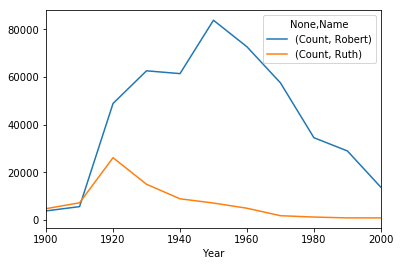

In [23]:
#Задание номер раз "Построить график изменения количества имен Ruth и Robert с 1900 по 2000."
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv(os.path.join(DATA_FOLDER + 'yob{}.txt'.format(year)),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

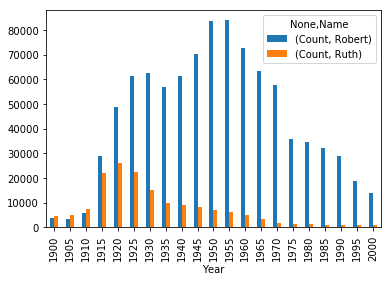

In [26]:
#Задание номер два
#"Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)."
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(os.path.join(DATA_FOLDER + 'yob{}.txt'.format(year)),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

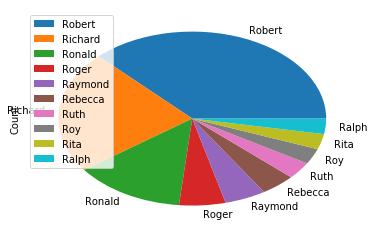

In [59]:
#Задание номер три
#"Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год."
names = pd.read_csv(os.path.join(DATA_FOLDER + 'yob1950.txt'),
        names=['Name','Gender','Count']
    )
names_r=names[(names.Name.str.startswith("R"))].sort_values(by='Count', ascending=False).head(10)
names_r_ten = names_r.drop(['Gender'], axis=1)
names_r_ten.plot.pie(y='Count', labels = names_r['Name'])

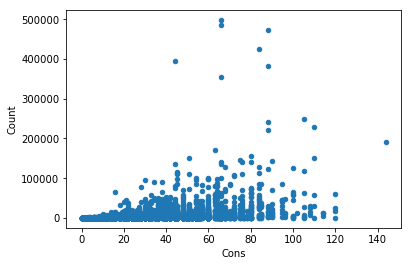

In [78]:
#Задание номер четыре
#"Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв 
# в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений"
names_all = []
for year in range(1900, 2001, 10):
    names_by_year = pd.read_csv(os.path.join(DATA_FOLDER + 'yob{}.txt'.format(year)),
        names=['Name','Gender','Count']
    )
    names_all.append(names_by_year)
names_all = pd.concat(names_all)
def count_cons(row):
    consonants = 0
    for i in row.Name:
        letter = i.lower()
        if letter == "a" or letter == "e" or\
           letter == "i" or letter == "o" or\
           letter == "u" or letter == "y":
            pass
        else:
            consonants += 1
    
    return consonants

names_all['Cons'] = names_all.apply(count_cons, axis=1)

names_for_scatter = names_all.groupby('Name').sum()
names_for_scatter.plot.scatter(x='Cons', y='Count')